In [290]:
import meep as mp
import math
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from IPython.display import Video

In [291]:
resolution = 50        # pixels/μm

nperiods = 8

incident_angle = 0     # angle of incidence in degrees
theta_i = incident_angle * math.pi/180

fsrc = 1.25            # frequency of the source

dpml = 2.0             # PML thickness
dsub = 3.0             # substrate thickness
dpad = 3.0             # padding between grating and PML
gp = 2.4              # grating period
gh = 0.05               # grating height
gdc = 0.5              # grating duty cycle

ff_distance = 1e3      # far-field distance from near-field monitor
ff_angle = 50          # far-field cone angle
ff_npts = 500          # number of far-field points

ff_length = ff_distance*math.tan(math.radians(ff_angle))
ff_res = ff_npts/ff_length

sx = dpml+dsub+gh+dpad+dpml
sy = gp
cell_size = mp.Vector3(sx)

# Materials
from meep.materials import Ag

n_air = 1
n_mat = 1.5

<AxesSubplot:xlabel='X', ylabel='Y'>

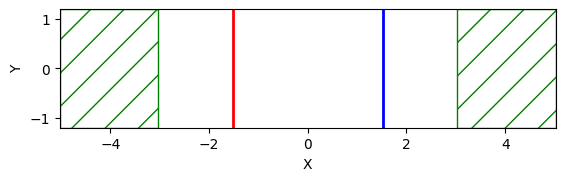

In [292]:
cell_size = mp.Vector3(sx,sy)

pml_layers = [mp.PML(thickness=dpml, direction=mp.X)]

k_point = mp.Vector3(fsrc * n_air).rotate(mp.Vector3(z=1), theta_i)

src_pt = mp.Vector3(-0.5*sx+dpml+0.5*dsub)
sources = [
    mp.EigenModeSource(
        src=mp.ContinuousSource(fsrc),
        center=src_pt,
        size=mp.Vector3(y=sy),
        direction=mp.AUTOMATIC if theta_i == 0 else mp.NO_DIRECTION,
        eig_kpoint=k_point,
        eig_band=1,
        eig_parity=mp.EVEN_Y + mp.ODD_Z if theta_i == 0 else mp.ODD_Z,
        eig_match_freq=True,
    )
]

sim = mp.Simulation(resolution=resolution,
                    split_chunks_evenly=True,
                    cell_size=cell_size,
                    boundary_layers=pml_layers,
                    k_point=k_point,
                    sources=sources)


n2f_pt = mp.Vector3(0.5*sx-dpml-0.5*dpad)
n2f_obj = sim.add_near2far(fsrc, 0, 1, mp.Near2FarRegion(center=n2f_pt, size=mp.Vector3(y=sy)), nperiods=nperiods)

sim.plot2D()

-----------
Initializing structure...
time for choose_chunkdivision = 8.01086e-05 s
Working in 2D dimensions.
Computational cell is 10.06 x 2.4 x 0 with resolution 50
time for set_epsilon = 0.0684619 s
-----------
Meep: using complex fields.
MPB solved for frequency_1(1.25,0,0) = 1.25 after 19 iters


run 0 finished at t = 10.0 (1000 timesteps)


<AxesSubplot:xlabel='X', ylabel='Y'>

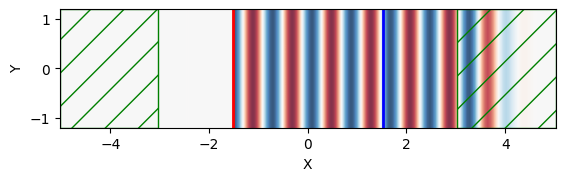

In [293]:
sim.run(until=10)

ff_source = sim.get_farfields(n2f_obj, ff_res, center=mp.Vector3(ff_distance,0.5*ff_length), size=mp.Vector3(y=ff_length))

sim.plot2D(fields=mp.Ez)

---

     block, center = (2.5125,0,0)
          size (5.025,1e+20,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.25,2.25,2.25)
     block, center = (0,0,0)
          size (0.05,1.2,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)


<AxesSubplot:xlabel='X', ylabel='Y'>

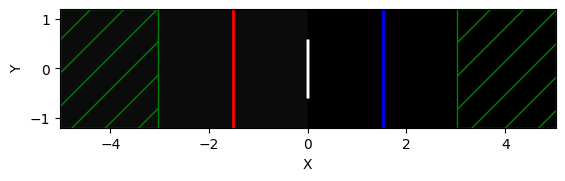

In [294]:
geometry = [
    mp.Block(material=mp.Medium(index=n_mat), center=mp.Vector3(sx/4), size=mp.Vector3(sx/2, mp.inf)),
    mp.Block(material=Ag, center=mp.Vector3(), size=mp.Vector3(gh, gdc*gp)),
]

sim.reset_meep()

sim = mp.Simulation(resolution=resolution,
                    split_chunks_evenly=True,
                    cell_size=cell_size,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    k_point=k_point,
                    sources=sources)

n2f_obj = sim.add_near2far(fsrc, 0, 1, mp.Near2FarRegion(center=n2f_pt, size=mp.Vector3(y=sy)), nperiods=nperiods)

sim.plot2D()

-----------
Initializing structure...
time for choose_chunkdivision = 8.67844e-05 s
Working in 2D dimensions.
Computational cell is 10.06 x 2.4 x 0 with resolution 50
     block, center = (2.5125,0,0)
          size (5.025,1e+20,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.25,2.25,2.25)
     block, center = (0,0,0)
          size (0.05,1.2,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.113794 s
lorentzian susceptibility: frequency=16.365, gamma=1.95106
lorentzian susceptibility: frequency=7.32593, gamma=0.738804
lorentzian susceptibility: frequency=6.60165, gamma=0.052426
lorentzian susceptibility: frequency=3.61417, gamma=0.364563
lorentzian susceptibility: frequency=0.658148, gamma=3.13427
drude susceptibility: frequency=1e-10, gamma=0.0387146
-----------
Meep: using complex fields.
MPB solved for frequency_1(1.25,0,0) = 1.25 after 19 iters
Meep progress: 

run 0 finished at t = 50.0 (5000 timesteps)
     block, center = (2.5125,0,0)
          size (5.025,1e+20,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.25,2.25,2.25)
     block, center = (0,0,0)
          size (0.05,1.2,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)


<AxesSubplot:xlabel='X', ylabel='Y'>

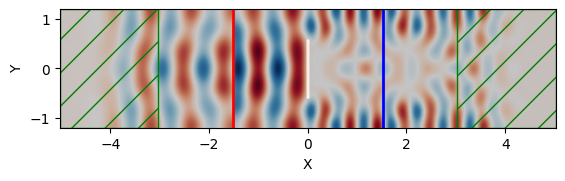

In [295]:
sim.run(until=50)

ff_unitcell = sim.get_farfields(n2f_obj, ff_res, center=mp.Vector3(ff_distance,0.5*ff_length), size=mp.Vector3(y=ff_length))

sim.plot2D(fields=mp.Ez)

In [296]:
sim.reset_meep()

freqs = mp.get_near2far_freqs(n2f_obj)
wvl = np.divide(1,freqs)
ff_lengths = np.linspace(0,ff_length,ff_npts)
angles = [math.degrees(math.atan(f)) for f in ff_lengths/ff_distance]

Text(0.5, 1.0, 'Peaks with incident angle 0')

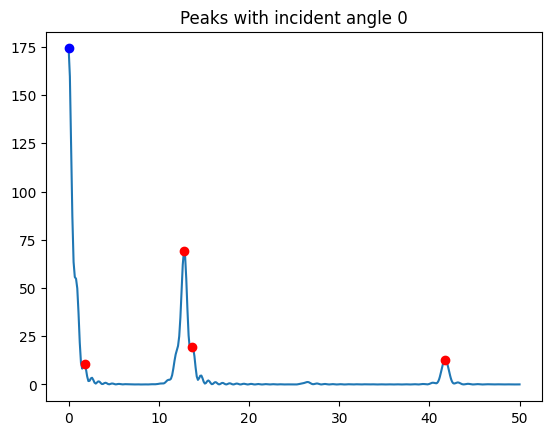

In [297]:
I = np.abs(ff_unitcell['Ez'])**2
plt.plot(angles, I)

from scipy.signal import argrelextrema
max_ind = np.array(argrelextrema(I, np.greater))
max_ind = max_ind[I[max_ind] > 0.03*np.max(I)]
idx = np.argmax(I)
max_ind = max_ind[idx < max_ind]
r = I[max_ind]
plt.plot(np.array(angles)[max_ind], r, 'ro') # Peaks with order > 1
plt.plot(np.array(angles)[idx], np.max(I), 'bo') # 0th order peak
plt.title('Peaks with incident angle %i' % incident_angle)
# plt.savefig('diff_pattern_%i.png' % incident_angle)

---
### Comparison with the theory

$n_\text{mat} = \frac1{\sin\varphi_{l,\text{out}}}\left(\sin\varphi_{l,\text{in}}+l\frac\lambda\Lambda\right)$

We find


In [298]:
i = 0
for angle in np.array(angles)[max_ind]:
    print('l=%i angle: %f' % (i, angle))
    i += 1

l=0 angle: 1.778330
l=1 angle: 12.783247
l=2 angle: 13.690872
l=3 angle: 41.771806


In [299]:
theta_out = np.radians(np.array(angles)[max_ind][0])
n_pred = (np.sin(theta_i) + 1/(fsrc*gp)) / np.sin(theta_out)
n_pred

10.741345572406589